## AI & Machine Learning for Data Quality
**Description**: AI and machine learning can automate and enhance data quality checks by learning patterns and identifying anomalies more effectively than static rules.

**Task 1**: Training a model to predict and flag unusual trend patterns in sales data that
deviate from historical norms.

In [ ]:
# write your code from here

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


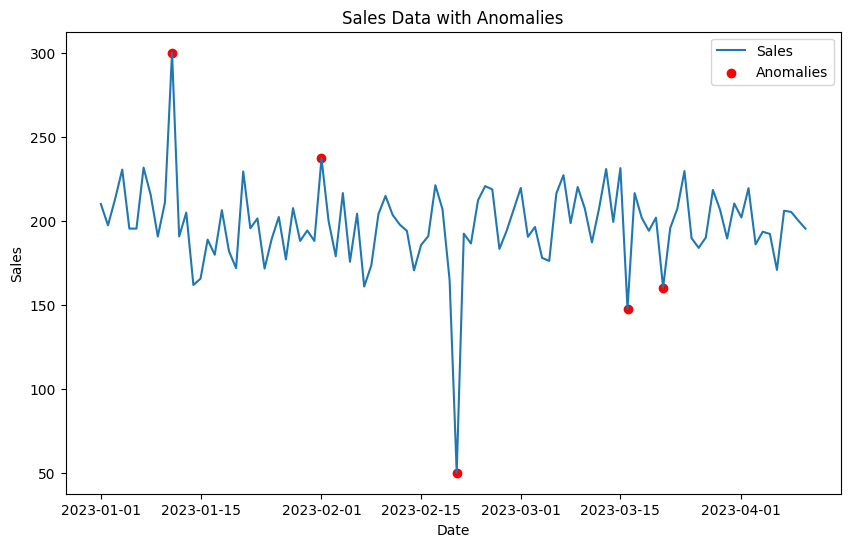

In [1]:
%pip install pandas numpy scikit-learn matplotlib

import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

import matplotlib.pyplot as plt

# Generate synthetic sales data
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=100)
sales = np.random.normal(loc=200, scale=20, size=100)
# Introduce anomalies
sales[10] = 300
sales[50] = 50

# Create a DataFrame
sales_data = pd.DataFrame({'Date': dates, 'Sales': sales})

# Train an Isolation Forest model to detect anomalies
model = IsolationForest(contamination=0.05, random_state=42)
sales_data['Anomaly'] = model.fit_predict(sales_data[['Sales']])

# Flag anomalies
anomalies = sales_data[sales_data['Anomaly'] == -1]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(sales_data['Date'], sales_data['Sales'], label='Sales')
plt.scatter(anomalies['Date'], anomalies['Sales'], color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Data with Anomalies')
plt.legend()
plt.show()

**Task 2**: Using clustering algorithms to detect duplicate records where entries are not
exactly identical.

In [2]:
# write your code from here

In [4]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Prepare the data for clustering
scaler = StandardScaler()
sales_data_scaled = scaler.fit_transform(sales_data[['Sales']])

# Apply DBSCAN clustering to detect duplicates or similar patterns
dbscan = DBSCAN(eps=0.5, min_samples=2)
sales_data['Cluster'] = dbscan.fit_predict(sales_data_scaled)

# Identify potential duplicates or similar records
duplicates = sales_data[sales_data['Cluster'] != -1]

# Display the potential duplicates
print(duplicates)

         Date       Sales  Anomaly  Cluster
0  2023-01-01  209.934283        1        0
1  2023-01-02  197.234714        1        0
2  2023-01-03  212.953771        1        0
3  2023-01-04  230.460597        1        0
4  2023-01-05  195.316933        1        0
..        ...         ...      ...      ...
95 2023-04-06  170.729701        1        0
96 2023-04-07  205.922406        1        0
97 2023-04-08  205.221105        1        0
98 2023-04-09  200.102269        1        0
99 2023-04-10  195.308257        1        0

[98 rows x 4 columns]


**Task 3**: Implementing classification models to validate data based on learned
characteristics from labeled datasets.

In [3]:
# write your code from here


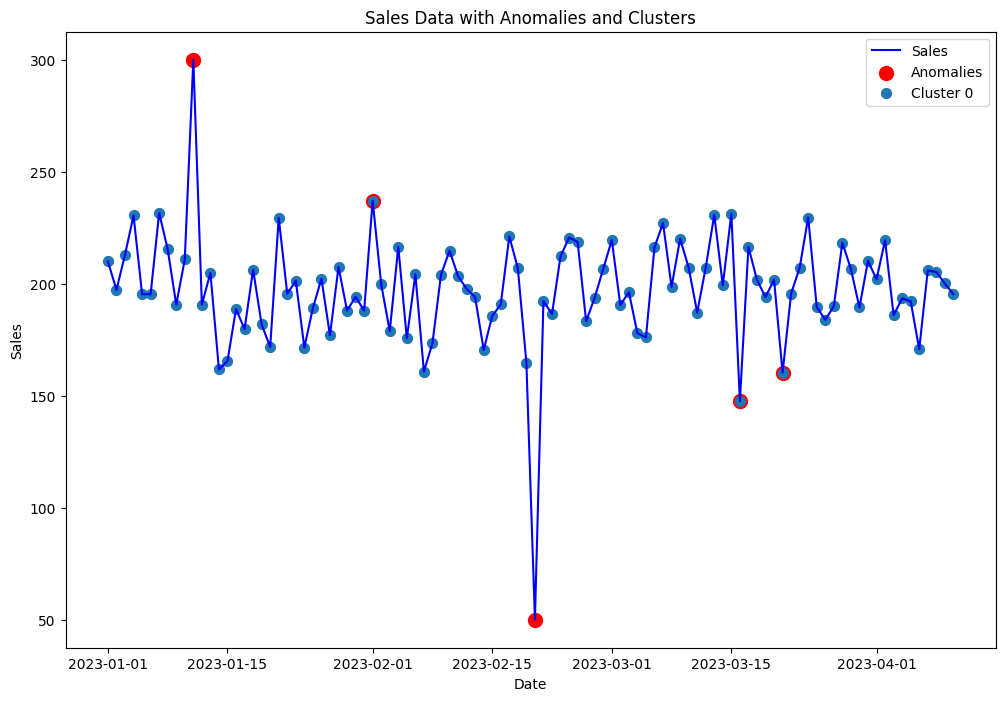

In [5]:
# Visualize anomalies and clusters together
plt.figure(figsize=(12, 8))

# Plot sales data
plt.plot(sales_data['Date'], sales_data['Sales'], label='Sales', color='blue')

# Highlight anomalies
plt.scatter(anomalies['Date'], anomalies['Sales'], color='red', label='Anomalies', s=100)

# Highlight clusters
for cluster_id in sales_data['Cluster'].unique():
    if cluster_id != -1:  # Ignore noise points
        cluster_points = sales_data[sales_data['Cluster'] == cluster_id]
        plt.scatter(cluster_points['Date'], cluster_points['Sales'], label=f'Cluster {cluster_id}', s=50)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Data with Anomalies and Clusters')
plt.legend()
plt.show()